In [25]:
import numpy as np
import tensorflow as tf
import cv2
import os
import glob
import matplotlib.pyplot as plt

##### Training data preprocessing

In [26]:
### Read bounding box annotations - training set
data_dir = "../wider_face/data"
with open(os.path.join(data_dir, "wider_face_split/wider_face_train_bbx_gt.txt"), "r") as file: 
    bbox_anno = [line.rstrip("\n, ") for line in file.readlines()]

In [27]:
### Create a dictionary such that it contains image_name:respective_annotations 
img_indices = []
n_bbxes = []
for i in range(len(bbox_anno)):
    if bbox_anno[i].endswith((".jpg", ".jpeg", ".png")):
        img_indices.append(i)
        n_bbxes.append(int(bbox_anno[i+1]))
dic = {}
for idx,n in list(zip(img_indices, n_bbxes)):
    img_name = bbox_anno[idx]
    res_annot = bbox_anno[idx+2 : idx+2+n]
    ### Remove blur, expression, illumination, invalid, occlusion and pose details. Keep x1, y1, w and h.
    res_annot = [" ".join(annot.split()[:4]) for annot in res_annot]
    dic[img_name] = res_annot

In [28]:
dic

{'0--Parade/0_Parade_marchingband_1_849.jpg': ['449 330 122 149'],
 '0--Parade/0_Parade_Parade_0_904.jpg': ['361 98 263 339'],
 '0--Parade/0_Parade_marchingband_1_799.jpg': ['78 221 7 8',
  '78 238 14 17',
  '113 212 11 15',
  '134 260 15 15',
  '163 250 14 17',
  '201 218 10 12',
  '182 266 15 17',
  '245 279 18 15',
  '304 265 16 17',
  '328 295 16 20',
  '389 281 17 19',
  '406 293 21 21',
  '436 290 22 17',
  '522 328 21 18',
  '643 320 23 22',
  '653 224 17 25',
  '793 337 23 30',
  '535 311 16 17',
  '29 220 11 15',
  '3 232 11 15',
  '20 215 12 16'],
 '0--Parade/0_Parade_marchingband_1_117.jpg': ['69 359 50 36',
  '227 382 56 43',
  '296 305 44 26',
  '353 280 40 36',
  '885 377 63 41',
  '819 391 34 43',
  '727 342 37 31',
  '598 246 33 29',
  '740 308 45 33'],
 '0--Parade/0_Parade_marchingband_1_778.jpg': ['27 226 33 36',
  '63 95 16 19',
  '64 63 17 18',
  '88 13 16 15',
  '231 1 13 13',
  '263 122 14 20',
  '367 68 15 23',
  '198 98 15 18',
  '293 161 52 59',
  '412 36 14 20

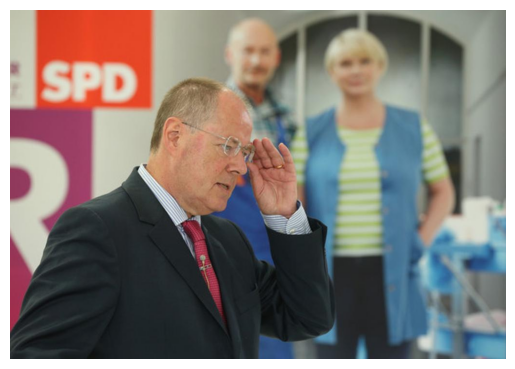

In [85]:
### Display random images from the training set
rand_n = np.random.randint(len(dic))
rand_img = list(dic.items())[rand_n]
bgr = cv2.imread(os.path.join(data_dir, "WIDER_train/images", rand_img[0]))
rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)
plt.axis("off")
plt.show()

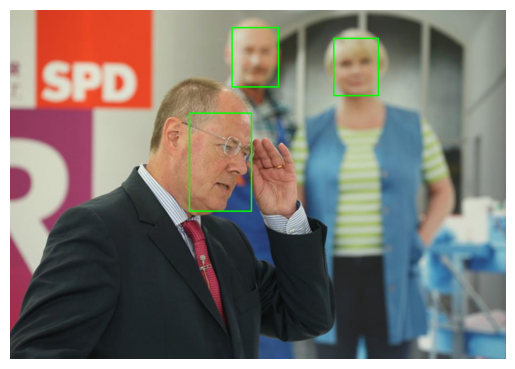

In [86]:
for annot in rand_img[1]:
    x, y, w, h = [int(pt) for pt in annot.split()]
    cv2.rectangle(rgb, (x, y), (x+w, y+h), (0, 255, 0), 2)
plt.imshow(rgb)
plt.axis("off")
plt.show()